**Цель задания** — визуализировать временной ряд, чтобы выявить тренды, сезонность и возможные аномалии. Поскольку данные охватывают несколько лет с полными 12 месяцами в каждом году, важно выбрать такой тип графика, который позволит наглядно отобразить изменения количества пассажиров с течением времени.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf

url='https://drive.google.com/file/d/1MY5-bEFb9i8PpZEUU_f8cFFiQKsvLwFO/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
# считываем датасет

df.head(10)
# смотрим что из себя представляет данный датасет, либо с 
# помощью команды .head(), либо с помощью команды .columns

df.isnull().sum()
# ищем пропуски

duplicates = df.duplicated()
duplicate_rows = df[duplicates]
duplicate_rows
# ищем дубликаты

# Преобразование столбца 'Month' в формат даты (при необходимости)
# Если у вас дата в формате YYYY-MM:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

# Переименование столбца для удобства
df = df.rename(columns={'#Passengers': 'Passengers'})

# Производим выборку по году если хотим выполнить следующий шаг и сгруппировать по году с расчетом суммы пассажиров на каждый год
df['Year'] = df['Month'].dt.year

# Группируем по году и расчитываем сумму пассажиров за каждый год
grouped = df.groupby('Year')['Passengers'].sum()
grouped
# будет ошибка если колонка Month преобразована в индексы, тк к мы будем пытаться обратиться к несуществующей колонке


Year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: Passengers, dtype: int64

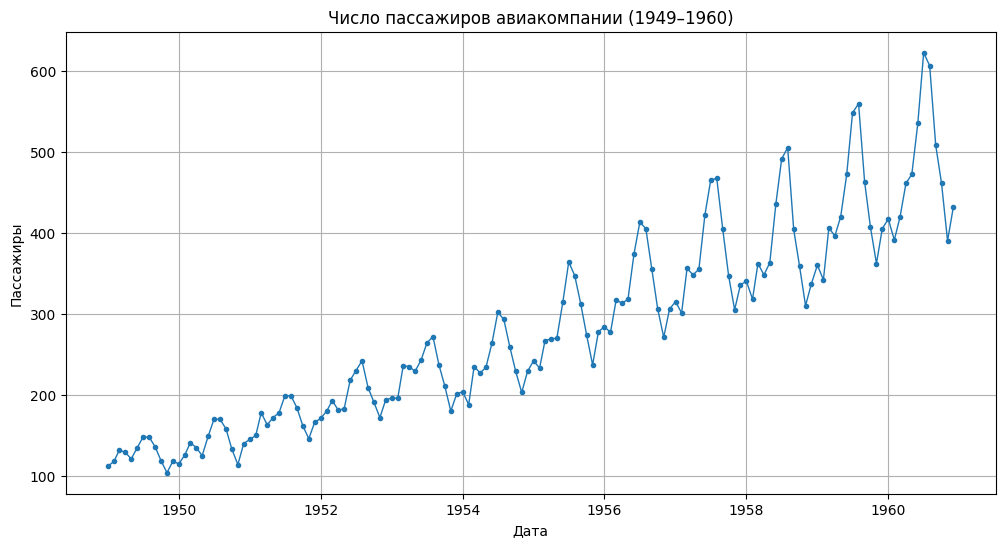

In [15]:
import matplotlib.pyplot as plt

# Установка столбца 'Month' в качестве индекса
df = df.set_index(['Month'])

plt.figure(figsize=(12, 6)) # размер рисунка в дюймах
plt.plot(df.index, df['Passengers'], marker='o', linestyle='-', linewidth=1, markersize=3) # функция для построения линий на графике, где в данном случае, мы выбираем два аргумента, сначала для оси X, затем для оси Y, после чего последующими аргументами производим настройку графика
plt.title('Число пассажиров авиакомпании (1949–1960)') # название графика
plt.xlabel('Дата') # название для колонки по оси X
plt.ylabel('Пассажиры') # название для колонки по оси Y
plt.grid(True) # включили сетку на графике
plt.show() # показать график иил отобразить

**Выводы по графику:**
* Тренд: Четкий восходящий тренд — число пассажиров растет с каждым годом.
* Сезонность: Ежегодные пики присутствуют, но дать больше конкретики по данному графику не представляется возможным.
* Аномалии: Присутствуют некоторые отклонения.

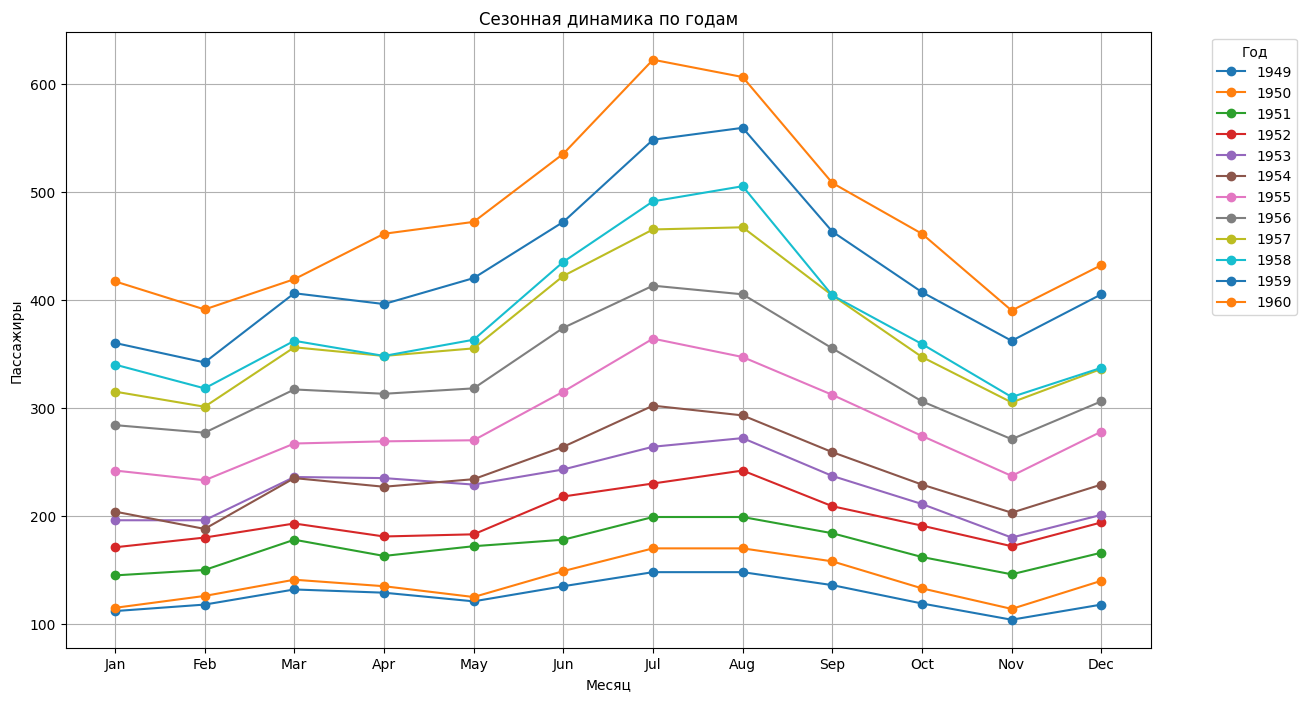

In [13]:
# Создаем колонку с годом
df['Year'] = df.index.year

# Построение графика
plt.figure(figsize=(14, 8)) # размер рисунка в дюймах
for year in df['Year'].unique(): # выбираем и возвращаем уникальные значения из столбца Year
    year_data = df[df['Year'] == year] # фильтрация DataFrame, выбирая только строки, где значение в столбце 'Year' равно текущему году из цикла. Результат сохраняется в year_data.
    plt.plot(year_data.index.month, year_data['Passengers'], label=year, marker='o') # извлекаем номер месяца из индекса year_data, это будет ось X графика. Далее звлекаем значения количества пассажиров из соответствующего столбца в year_data, это будет ось Y графика.
    # label=year:  Устанавливает метку для линии, соответствующую году.  Эта метка будет использована в легенде.
    # Цикл, который перебирает каждый уникальный год.

plt.title('Сезонная динамика по годам') # название графика
plt.xlabel('Месяц') # название для колонки по оси X
plt.ylabel('Пассажиры') # название для колонки по оси Y
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) # Устанавливает метки на оси X. Генерирует числа от 1 до 12 (номера месяцев), при этом каждое число соответствует списку сокращенных названий месяцев.
plt.legend(title='Год', bbox_to_anchor=(1.05, 1), loc='upper left') # создаем блок легенды на графике
plt.grid(True) # включить сетку
plt.show() # отобразить график

**Выводы по графику:**
* Тренд: Четкий восходящий тренд — число пассажиров растет с каждым годом.
* Сезонность: Ежегодные пики в летние месяцы (июль-август) и спад в октябре-ноябре.
* Аномалии: В 1953, 1954 и 1958 годах заметны отклонения от сезонного паттерна (возможно, экономические кризисы или погодные аномалии).
